<a href="https://colab.research.google.com/github/TaliaMelikhov/DL_BackPropagation/blob/master/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment # 2, CNN over Fasion MNIST**

In this assignment you are requested to build a convolutional network and train it over the Fasion MNIST data, which is a collection of 28X28 back and white images, classified into 10 different classes of clothing items. For more information about Fashion MNIST you may refer to: 
https://github.com/zalandoresearch/fashion-mnist 

In [0]:
# Loading Fashion MNIST


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import array as arr 
import matplotlib.pyplot as plt
from datetime import datetime

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

0it [00:00, ?it/s]

26427392it [00:01, 14761385.87it/s]                              


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 100952.80it/s]           
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


4423680it [00:01, 4291442.75it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


8192it [00:00, 36538.14it/s]            

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
# Use dataloaders for train and test (batch size is 4)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

In [0]:
# The images are of 1, 28, 28 size (only one black-white channel)

trainset[0][0].shape

torch.Size([1, 28, 28])

Here is what you need to do; you are encoureged to look at notebook "DL Notebook 9 - CIFAR CNN" when trying to complete the next steps.


Write a network CNNFMnist, that has the following architecture:

* Convolution with 10 3X3 filters
* Relu
* Max pool with 2X2
* Convolution with 5 3X3 filters
* Relu
* Convolution with 16 3X3 filters
* Relu
* Max pool with 2X2
* Liner, output size 128
* Relu
* Liner, output size 64
* Relu
* Liner, output size 10

In [0]:
class CNNFMnist(nn.Module):

    def __init__(self):
        super(CNNFMnist, self).__init__()
        #Convolution with 10 3X3 filters
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.conv2 = nn.Conv2d(10, 5, 3)
        self.conv3 = nn.Conv2d(5, 16, 3)

        # now a few fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features




Write a code that trains the network with FashionMNIST train dataset, for classification (use cross entropy, and SGD).
Run the network for at least 10 epochs, over the entire dataset. Make sure to print the loss over the train set as well as the **test set** over time (say, every 1000 batches, but it's up to you), so you will know where you are during training. 

Note, measuring loss of test is similar to measuring loss over the train test. However, make sure not to run the test images in back propagation. Use them only in forward and calulate the average loss over the entire test set. Since it will make the training process run slower, you should measure loss for the test set only at the end of an epoch (so overall you get 10 loss values for the test set). You are encoureged to write a different function for claculating the loss of the test set, and then call it from the training procedure.


You should collect the loss values in an array, so you can plot then into two curves, one for train and one for test.

In addition, you should measure the time it takes you to train the network completely.



In [0]:
#net = CNNFMnist().cuda()     # -- For GPU
net = CNNFMnist()            # -- For CPU

print(net)


CNNFMnist(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(5, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
def test_loss_clac():
  test_loss = 0.0
  for i, data  in enumerate(testloader, 0):
    inputs, labels = data
    #inputs = inputs.cuda() # -- For GPU
    #labels = labels.cuda() # -- For GPU
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    test_loss += loss.item()
  return test_loss/(len(testloader.dataset))


In [0]:
print(len(testloader.dataset))

10000


In [0]:

# define loss function

criterion = nn.CrossEntropyLoss()

# define the optimizer

optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#train_loss_arr = {}
#test_loss_arr = {}
train_loss_arr = arr.array('d', []) 
test_loss_arr = arr.array('d', []) 

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Training Start Time =", current_time)

for epoch in range(10):  

    running_loss = 0.0
    epoch_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        #inputs = inputs.cuda() # -- For GPU
        #labels = labels.cuda() # -- For GPU

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        epoch_loss += loss.item()
        if (i+1) % 1000 == 0:    
            print('[%d, %5d] train loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            #train_loss_arr.append(running_loss/1000)
            running_loss = 0.0

    train_loss_arr.append(epoch_loss / len(trainloader.dataset))
    epoch_loss = 0.0
    test_loss = test_loss_clac()
    test_loss_arr.append(test_loss)
    print('[%d] test loss: %.3f' %
                  (epoch + 1, test_loss))
    test_loss =0.0
   
print('Finished Training')
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Training End Time =", current_time)





Training Time = 18:02:16
[1,  1000] train loss: 2.302
[1,  2000] train loss: 2.297
[1,  3000] train loss: 1.914
[1,  4000] train loss: 0.978
[1,  5000] train loss: 0.772
[1,  6000] train loss: 0.719
[1,  7000] train loss: 0.664
[1,  8000] train loss: 0.628
[1,  9000] train loss: 0.599
[1, 10000] train loss: 0.573
[1, 11000] train loss: 0.561
[1, 12000] train loss: 0.552
[1, 13000] train loss: 0.542
[1, 14000] train loss: 0.505
[1, 15000] train loss: 0.505
[1] test loss: 0.124
[2,  1000] train loss: 0.506
[2,  2000] train loss: 0.483
[2,  3000] train loss: 0.473
[2,  4000] train loss: 0.461
[2,  5000] train loss: 0.477
[2,  6000] train loss: 0.465
[2,  7000] train loss: 0.417
[2,  8000] train loss: 0.462
[2,  9000] train loss: 0.458
[2, 10000] train loss: 0.449
[2, 11000] train loss: 0.450
[2, 12000] train loss: 0.424
[2, 13000] train loss: 0.424
[2, 14000] train loss: 0.426
[2, 15000] train loss: 0.399
[2] test loss: 0.106
[3,  1000] train loss: 0.393
[3,  2000] train loss: 0.374
[3,  

array('d', [0.23517404237181957, 0.11290024231211356, 0.09606405043247457, 0.08674542127293529, 0.08105915506762684, 0.07684484313333845, 0.07300914431889087, 0.07004094726718674, 0.06778524259818258, 0.06592401163524272])
array('d', [0.12419063698211685, 0.10641429917731439, 0.09379798705044741, 0.10880577322118952, 0.08751797830163151, 0.08092370106894141, 0.08197493506741982, 0.09338848924289832, 0.08048161948949667, 0.0759335251848664])


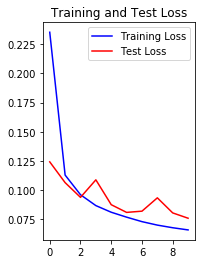

In [0]:

print(train_loss_arr)
print(test_loss_arr)
plt.subplot(1, 2, 2)
plt.plot(range(10), train_loss_arr, 'b', label='Training Loss')
plt.plot(range(10), test_loss_arr, 'r', label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.savefig('./foo.png')
plt.show()

Write a function that evaluates the resulted model over the entire test data of FashionMNIST. Provide a single accuracy number.

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #images = images.cuda()  # -- for GPU
        #labels = labels.cuda()  # -- for GPU

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 89 %


# Training with a GPU 
You are requested to change your code to use the GPU instead of the CPU.
This can be easily done bu converting every torch.tensor to torch.cuda.tensor. 

Specific instructions:
* Change the hardware equipent of your colab notebook. To do that, go to the "Runtime" menu, and then to "Change runtime type". In the dialog box, change "Hardware accelerator" to GPU.
* Please follow the lines that were commented out with the comment    # -- For GPU
* Also, remove the lines that have the comment # -- For CPU

Train your network again and compare training time.

# Submission instructions

You should submit a pdf file with the following items:

CPU Experiment:
*   Plot of loss curves (train in blue, test in red)
*   Training time

GPU Experiment:
*   Plot of loss curves (train in blue, test in red)
*   Training time

Link for your collab notebook.
ID and names of submitters.


Good luck!